# Gradients

Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.
Make sure to watch the lecture video for the full overview!

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('../DATA/sudoku.jpg',0)

In [7]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

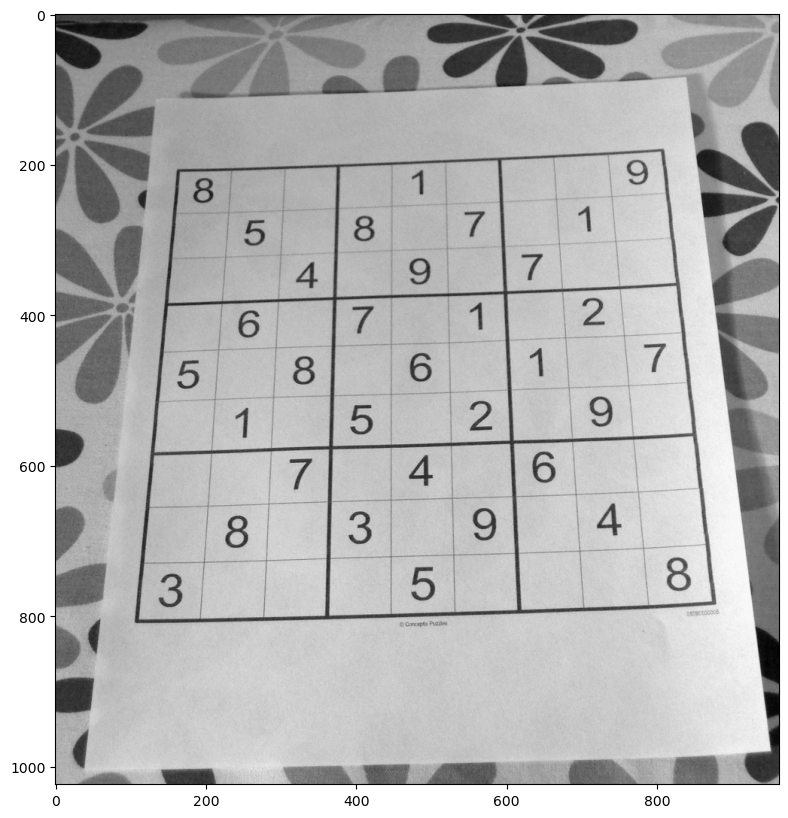

In [8]:
display_img(img)

In [9]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

Giải thích:


cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5):

- cv2.Sobel: Hàm này được sử dụng để áp dụng bộ lọc Sobel trên ảnh img.
- cv2.CV_64F: Đây là kiểu dữ liệu cho các giá trị gradient tính toán sau khi áp dụng bộ lọc Sobel. Trong trường hợp này, giá trị gradient được lưu trữ dưới dạng số thực 64-bit.
- 1, 0: Đây là đối số dx và dy, xác định hướng của gradient mà bạn muốn tính toán. Trong trường hợp này, bạn đang tính toán gradient theo hướng x (theo chiều ngang) và không tính toán theo hướng y (theo chiều dọc).
- ksize=5: Đây là kích thước của bộ lọc Sobel. Bộ lọc Sobel được sử dụng để phát hiện độ dốc (gradient) trong ảnh. Kích thước này xác định kích thước của vùng xung quanh mỗi điểm ảnh mà bộ lọc sẽ được áp dụng. Trong trường hợp này, kích thước là 5x5.


cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5):

- Tương tự như trên, nhưng bạn đang tính toán gradient theo hướng y (theo chiều dọc) và không tính toán theo hướng x.
cv2.Laplacian(img, cv2.CV_64F):

cv2.Laplacian: Hàm này được sử dụng để áp dụng bộ lọc Laplacian trên ảnh img.


- cv2.CV_64F: Đây cũng là kiểu dữ liệu cho các giá trị Laplacian tính toán sau khi áp dụng bộ lọc. Trong trường hợp này, giá trị Laplacian được lưu trữ dưới dạng số thực 64-bit.

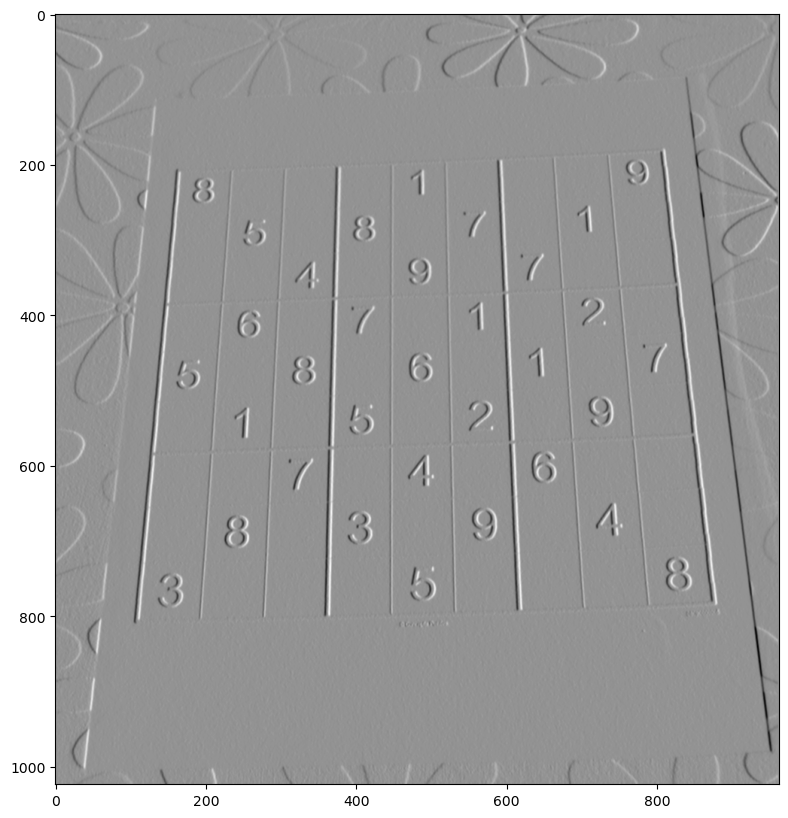

In [10]:
display_img(sobelx)

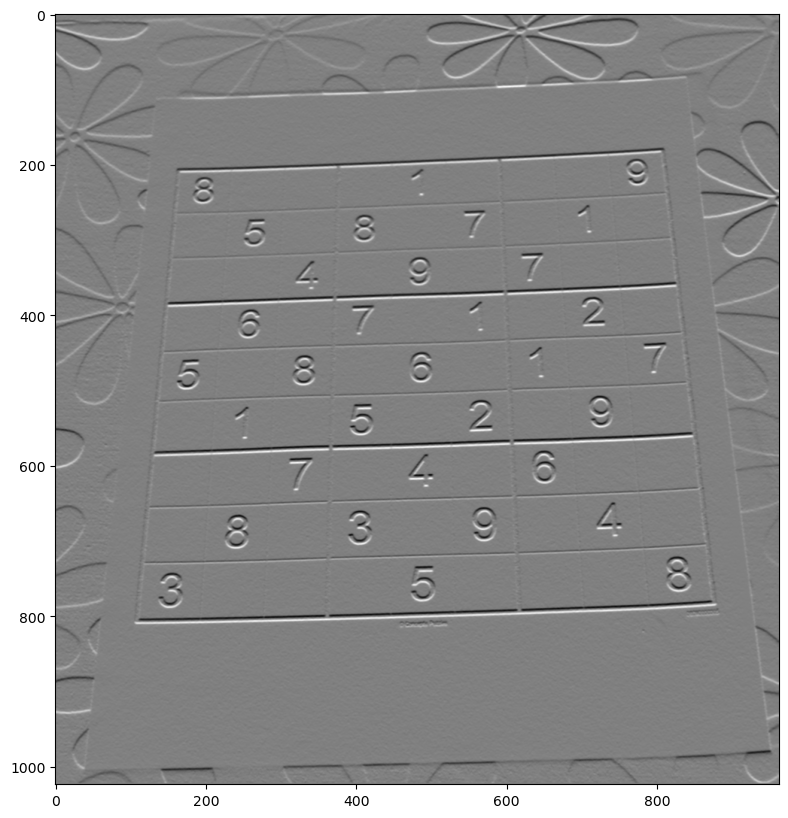

In [11]:
display_img(sobely)

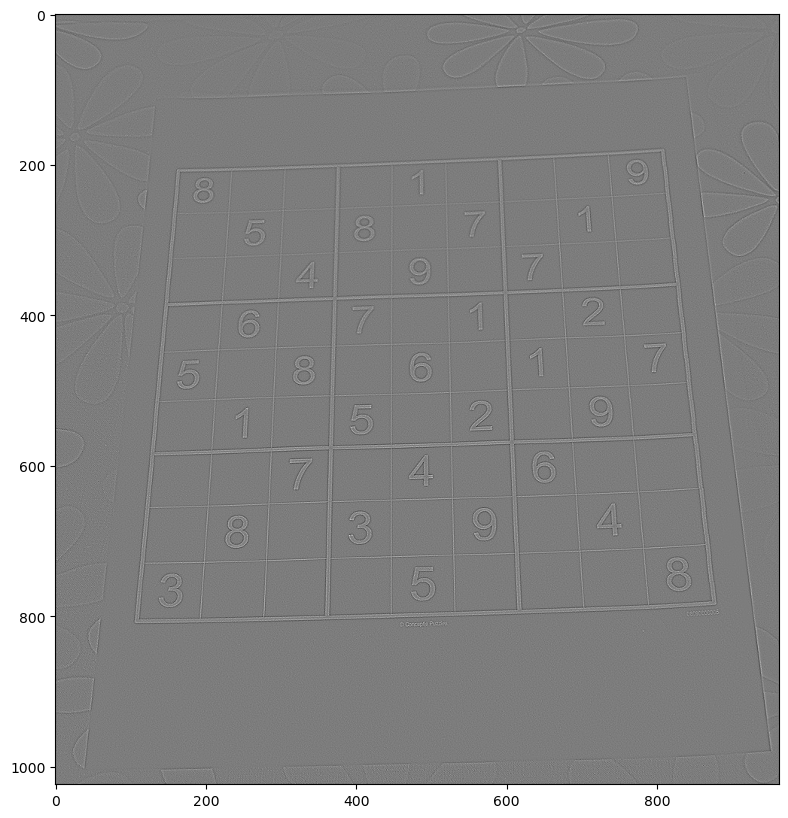

In [12]:
display_img(laplacian)

## Combining Previous Ideas

Let's play around with these images with some of the other ideas we've already seen!

### Blending Images

In [13]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

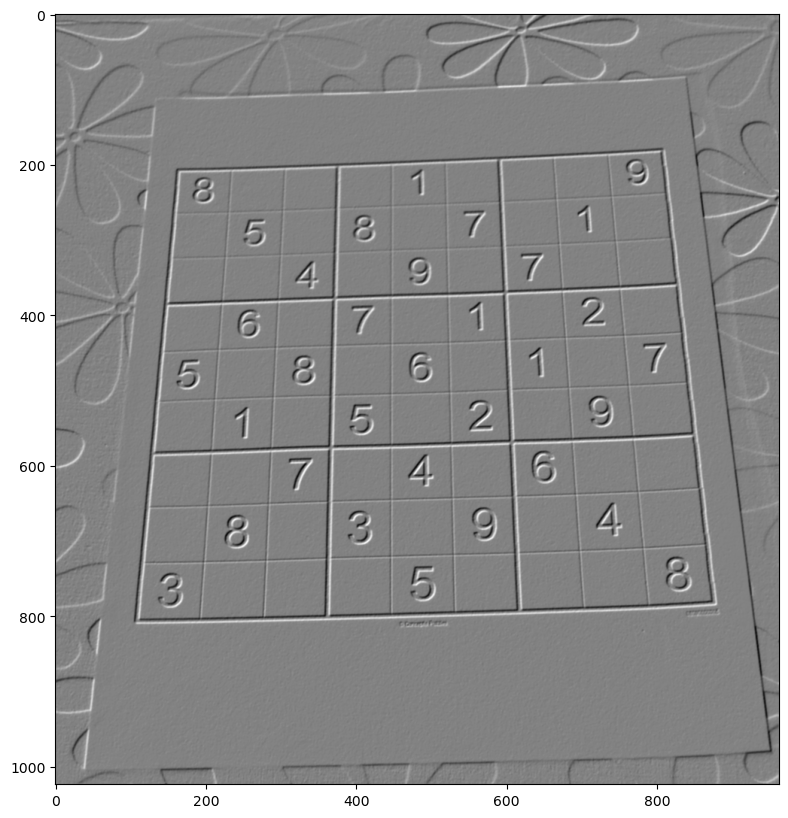

In [14]:
display_img(blended)

In [15]:
blended.shape

(1024, 962)

### Morphological Operators

In [16]:
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

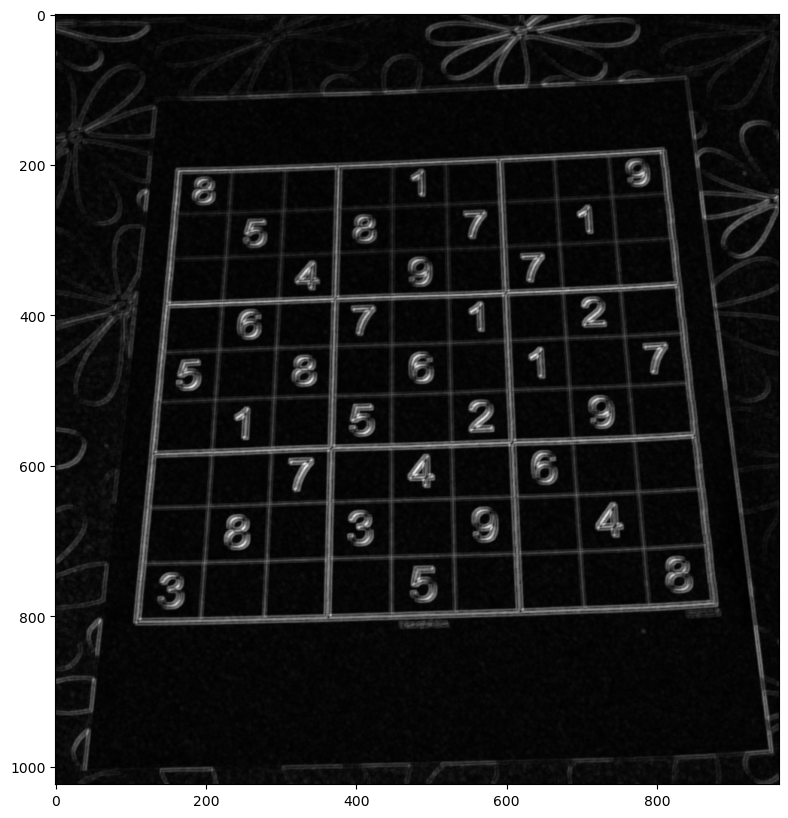

In [17]:
display_img(gradient)

Try it on the laplacian result!

In [18]:
kernel = np.ones((3,3),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

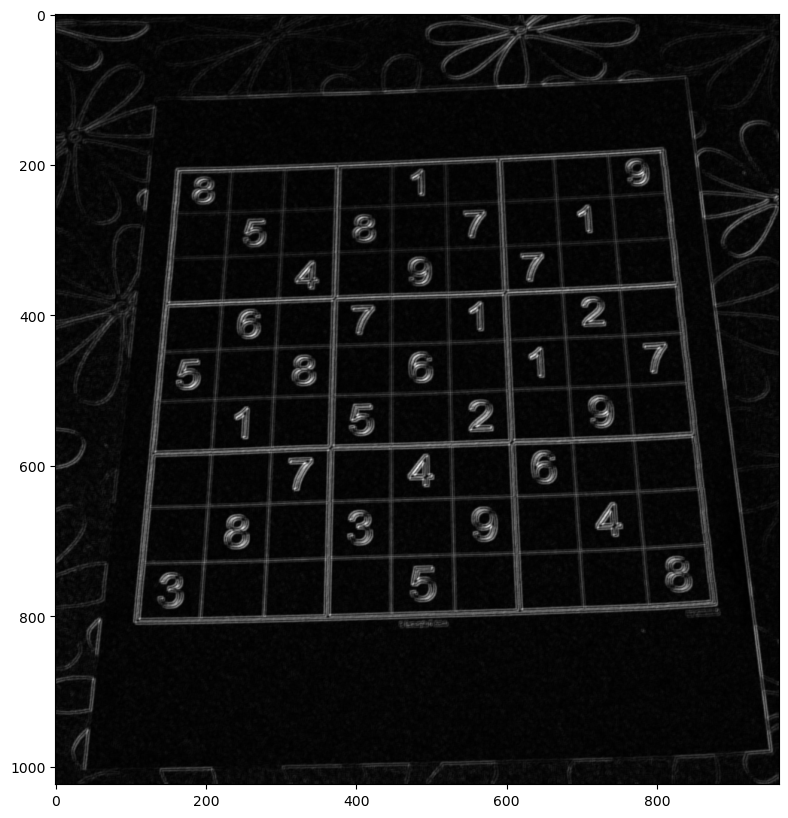

In [19]:
display_img(gradient)

### Thresholds

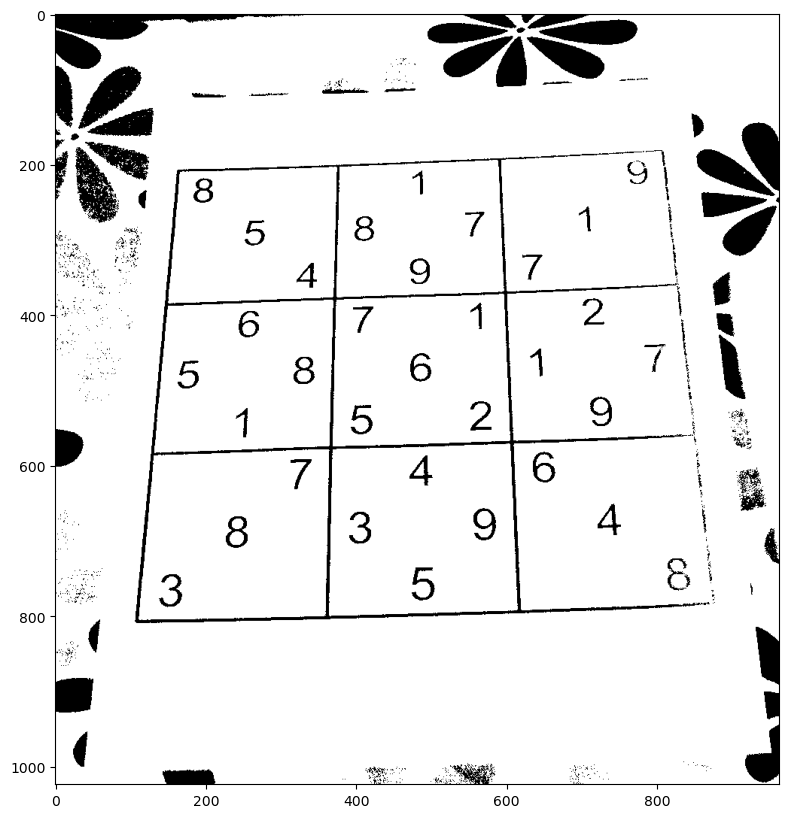

In [20]:
ret,th1 = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
display_img(th1)

Giải thích: 


- img: Đây là hình ảnh đầu vào mà bạn muốn thực hiện ngưỡng hóa.

- 100: Đây là ngưỡng (threshold) được sử dụng trong quá trình ngưỡng hóa. Tất cả các điểm ảnh có giá trị lớn hơn ngưỡng này sẽ được đặt thành 255 (trắng), và tất cả các điểm ảnh có giá trị nhỏ hơn hoặc bằng ngưỡng này sẽ được đặt thành 0 (đen). Trong trường hợp này, ngưỡng là 100.

- 255: Đây là giá trị tối đa mà điểm ảnh có thể nhận sau quá trình ngưỡng hóa. Trong hầu hết các trường hợp, giá trị này thường là 255, để biểu thị màu trắng sau khi ngưỡng hóa.

- cv2.THRESH_BINARY: Đây là loại ngưỡng hóa. Trong trường hợp này, bạn đang sử dụng ngưỡng nhị phân (binary thresholding), có nghĩa là điểm ảnh sẽ chỉ nhận giá trị 0 hoặc 255 sau khi ngưỡng hóa.

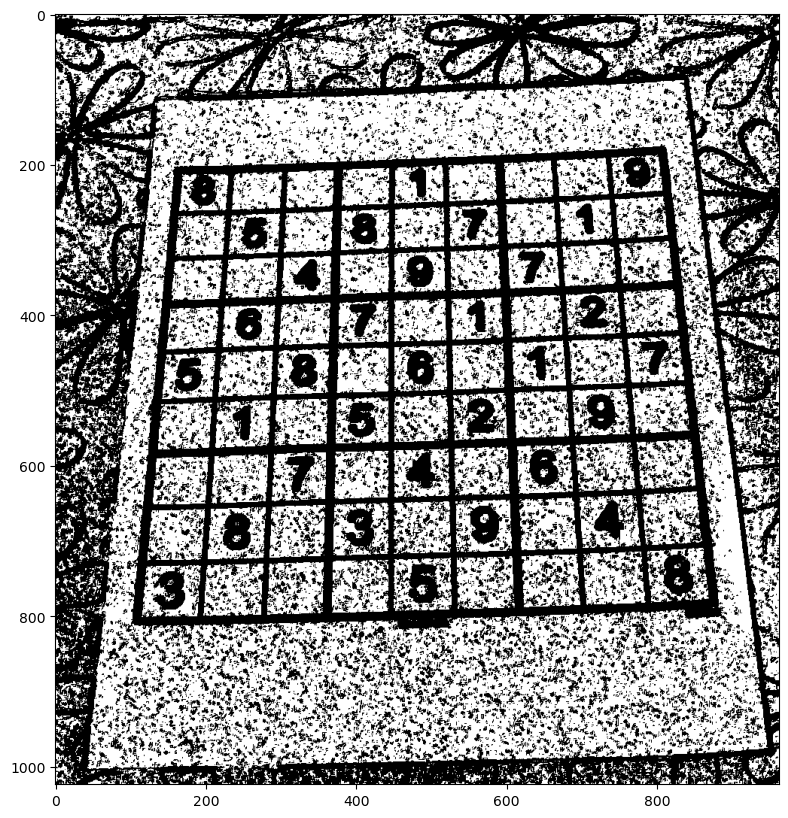

In [21]:
ret,th1 = cv2.threshold(gradient,200,255,cv2.THRESH_BINARY_INV)
display_img(th1)

Giải thích:


- gradient: Đây là hình ảnh đầu vào mà bạn muốn thực hiện ngưỡng hóa. Trong trường hợp này, gradient thường là hình ảnh đã được xử lý trước đó để tính toán gradient.

- 200: Đây là ngưỡng (threshold) được sử dụng trong quá trình ngưỡng hóa. Tất cả các điểm ảnh có giá trị lớn hơn ngưỡng này sẽ được đặt thành 255 (trắng), và tất cả các điểm ảnh có giá trị nhỏ hơn hoặc bằng ngưỡng này sẽ được đặt thành 0 (đen). Trong trường hợp này, ngưỡng là 200.

- 255: Đây là giá trị tối đa mà điểm ảnh có thể nhận sau quá trình ngưỡng hóa. Trong hầu hết các trường hợp, giá trị này thường là 255, để biểu thị màu trắng sau khi ngưỡng hóa.

- cv2.THRESH_BINARY_INV: Đây là loại ngưỡng hóa. cv2.THRESH_BINARY_INV có nghĩa là điểm ảnh sẽ chỉ nhận giá trị 0 hoặc 255 sau khi ngưỡng hóa, nhưng có một sự đảo ngược so với cv2.THRESH_BINARY. Nói cách khác, các điểm ảnh có giá trị lớn hơn ngưỡng sẽ trở thành 0 (đen), và các điểm ảnh có giá trị nhỏ hơn hoặc bằng ngưỡng sẽ trở thành 255 (trắng).

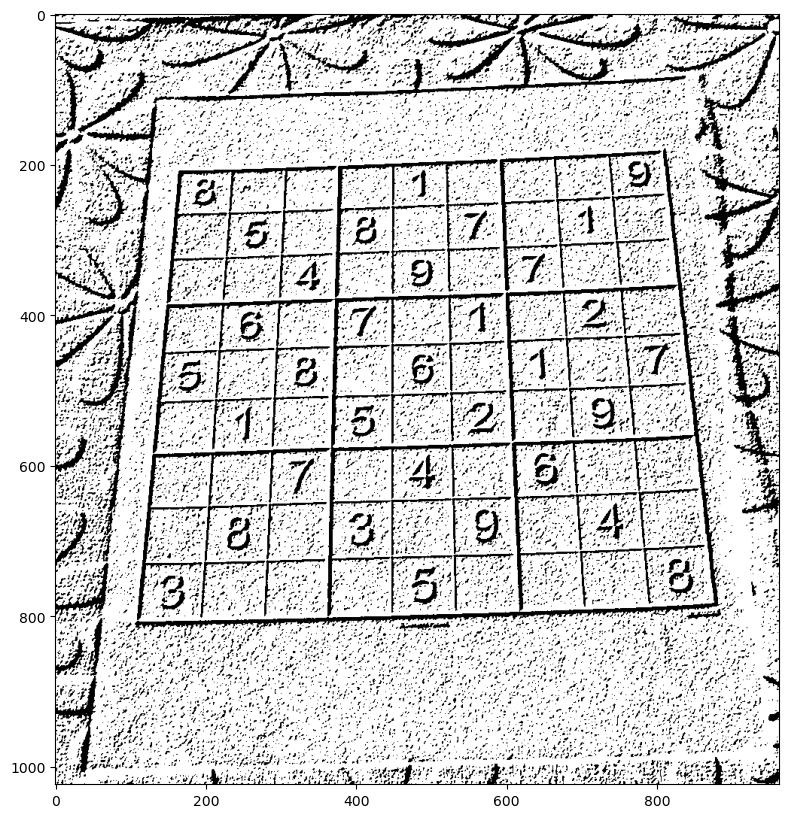

In [22]:
ret,th1 = cv2.threshold(blended,100,255,cv2.THRESH_BINARY_INV)
display_img(th1)

##### Great Work! Keep this sudoku in mind. Later on you will have the computer vision skills to create a program that can solve sudoku puzzles just by reading the image!